# Predictive Modeling for Personal Loan Conversion
`Authored by:` Muhammad Abuzar\
`DH-ID:` DHC-653\
`Where to contact:` abuzaransri87@gmail.com

## Introduction:
In the competitive landscape of modern banking, targeted marketing is essential for optimizing resource allocation and improving conversion rates. This project focuses on analyzing the Bank Marketing Dataset to predict customer behavior—specifically, whether a client will subscribe to a personal loan offer.

By leveraging historical data—including demographic profiles (age, job, marital status) and previous marketing interactions—we aim to transition from a "scattergun" marketing approach to a data-driven strategy. Using classification algorithms like Logistic Regression and Decision Trees, we will identify the underlying patterns that distinguish a "yes" from a "no," allowing the bank to focus its efforts on high-probability leads.

## Project Objectives
To successfully complete this predictive analysis, we will focus on the following core milestones:
- **Exploratory Data Analysis (EDA):** Perform a deep dive into the dataset to uncover correlations between demographic features (such as occupation and marital status) and loan acceptance rates.
- **Feature Engineering & Selection:** Identify and prepare the most influential variables that drive a customer's decision-making process.
- **Model Development:** Train and validate classification models, specifically _Logistic Regression_ and _Decision Trees_, to establish a baseline for prediction accuracy.
- **Business Insight Extraction:** Translate model outputs into actionable insights, identifying specific "customer personas" that are most likely to accept loan offers.
- **Performance Evaluation:** Assess the model using industry-standard metrics (Accuracy, Precision, Recall, and F1-Score) to ensure the predictions are reliable for real-world application.

In [56]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# load the dataset
df = pd.read_csv('bank_marketing_dataset.csv',sep=';')
# display the first few rows of the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [58]:
# check information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [59]:
# columns that are relevant to personal loan prediction
required_columns = [
    'age', 'job', 'marital', 'education', 'default', 
    'balance', 'housing', 'loan']
df = df[required_columns]
# display the first few rows of the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
4,33,unknown,single,unknown,no,1,no,no


In [60]:
# check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
dtype: int64

In [61]:
# check for duplicate rows
df.duplicated().sum()

np.int64(4163)

In [62]:
# remove duplicate rows
df = df.drop_duplicates()

In [63]:
# check descriptive statistics of the dataset
df.describe()

,age,balance
count,41048.000000,41048.000000
mean,40.920483,1375.931129
std,10.540510,3055.188601
min,18.000000,-8019.000000
25%,33.000000,91.000000
50%,39.000000,469.000000
75%,48.000000,1449.000000
max,95.000000,102127.000000


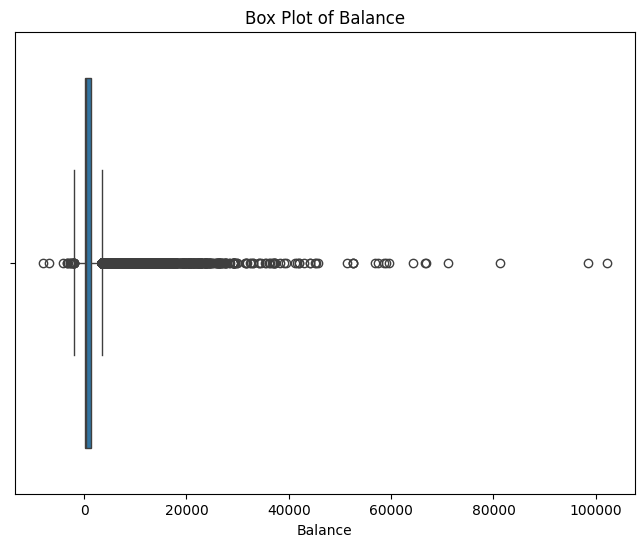

In [64]:
# box plor for balance
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['balance'])
plt.title('Box Plot of Balance')
plt.xlabel('Balance')
plt.show()

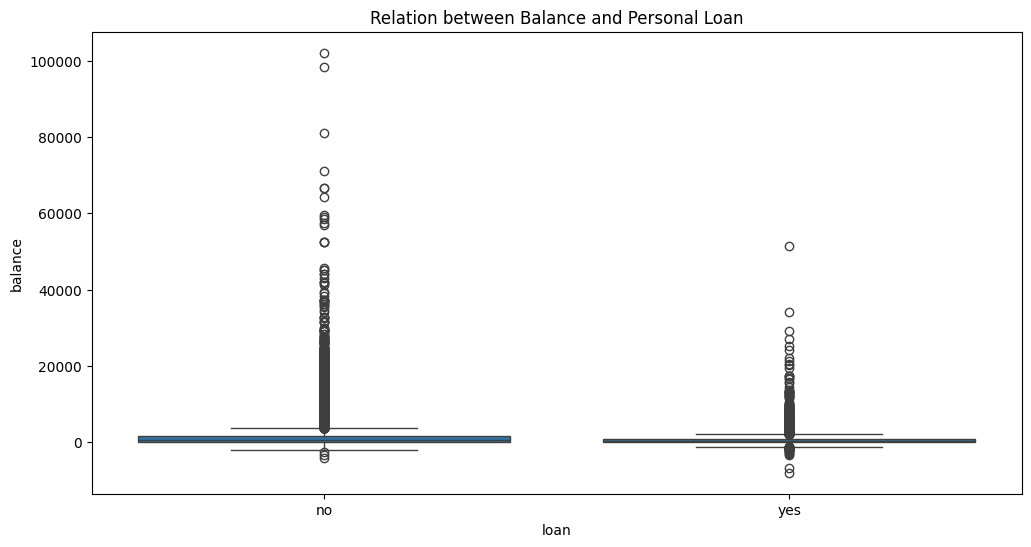

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan', y='balance', data=df)
plt.title('Relation between Balance and Personal Loan')
plt.show()

In [66]:
# remove outliers from balance column that are above 10000
df = df[df['balance'] <= 10000]

## Data Understanding

### 1.1 Data Overview
After performing an initial analysis of the Bank Marketing dataset, the following key characteristics were identified:
* **Total Records:** 45,211 rows.
* **Total Features:** 17 columns (including Age, Job, Marital, Education, Default, Balance, Housing, and Loan).
* **Data Quality:** The dataset contains zero null values, indicating high data integrity and making it suitable for immediate processing.

### 1.2 Data Cleaning
To refine the dataset for predictive modeling, several pre-processing steps were implemented:
* **Handling Duplicates:** 4,163 duplicate rows were identified and removed to ensure the model does not overfit on redundant information.
* **Feature Selection:** Since the objective is to predict personal loan acceptance, we focused on demographic and financial features, specifically: `age`, `job`, `marital`, `education`, `default`, `balance`, `housing`, and `loan`.

### 1.3 Outlier Management (Balance Column)
A descriptive statistical analysis of the `balance` column revealed significant variance:
* **Negative Balance:** Some customers exhibit a negative balance (as low as -8,019). We decided to **retain** these values as they represent financial debt or overdraft usage, which are critical indicators of loan eligibility and risk.
* **Positive Outliers:** The maximum balance reached 102,127. Following a Box Plot analysis, we capped the balance at **10,000**. This ensures the model focuses on the general consumer base and prevents extreme outliers from skewing the prediction results.

### 1.4 Target Variable Definition
* The **`loan`** column has been designated as the Target Variable.
* This feature indicates whether a customer currently has a personal loan, which we will use to identify patterns for future loan acceptance.

## Exploratory Data Analysis:

C:\Users\DELL E7480 A&I\AppData\Local\Temp\ipykernel_12716\3987176121.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan', data=df, palette='Set2')


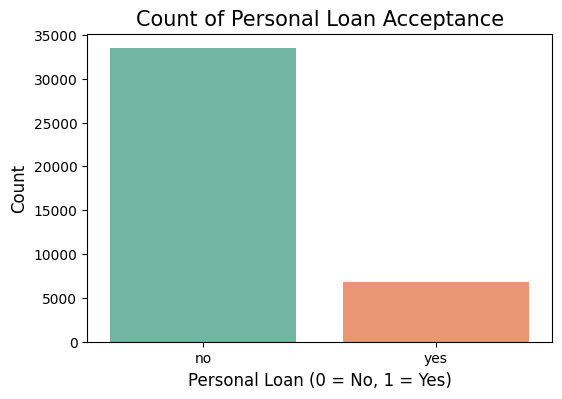

In [67]:
# count plot for loan column
plt.figure(figsize=(6, 4))
sns.countplot(x='loan', data=df, palette='Set2')
plt.title('Count of Personal Loan Acceptance', fontsize=15)
plt.xlabel('Personal Loan (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

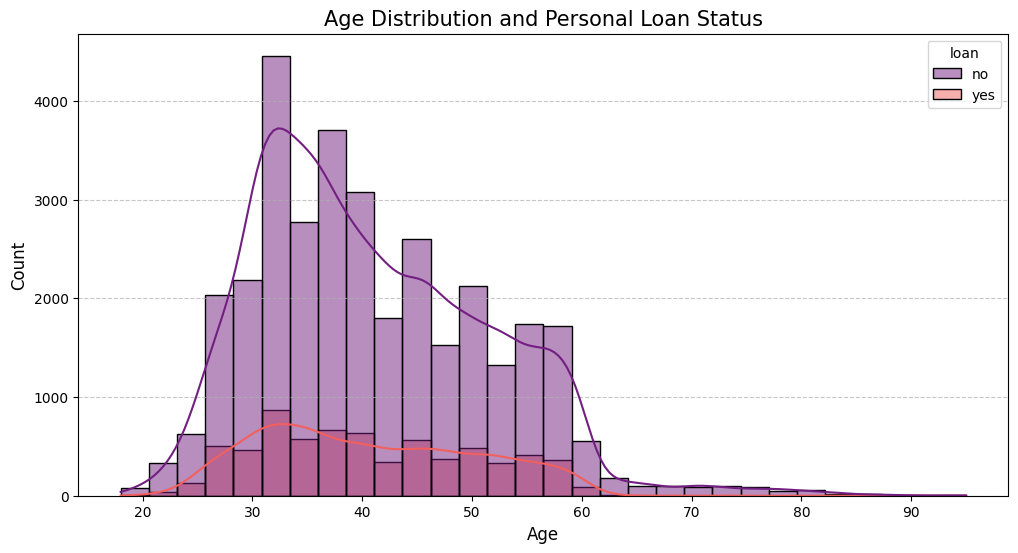

In [68]:
# Plotting settings
plt.figure(figsize=(12, 6))

# 1. Histogram with KDE to see the density
sns.histplot(data=df, x='age', hue='loan', kde=True, bins=30, palette='magma')

plt.title('Age Distribution and Personal Loan Status', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Insight:

#### A. Target Variable Distribution
* The dataset is highly **imbalanced**, with approximately **33,000 (82%)** customers having no personal loan and only **7,000 (18%)** having accepted one.
* **Implication:** We need to monitor the model's performance using a Confusion Matrix and F1-Score rather than just simple Accuracy, to ensure it predicts the minority 'Yes' class correctly.

#### B. Age Analysis
* The age distribution shows a **right-skewed** pattern, with the highest concentration of customers between **30 and 35 years old**.
* Both loan acceptors and non-acceptors follow a similar age trend, indicating that while middle-aged customers are the most frequent bank users, they are also the primary target for personal loans.
* Loan acceptance significantly thins out as customers approach retirement age (60+).

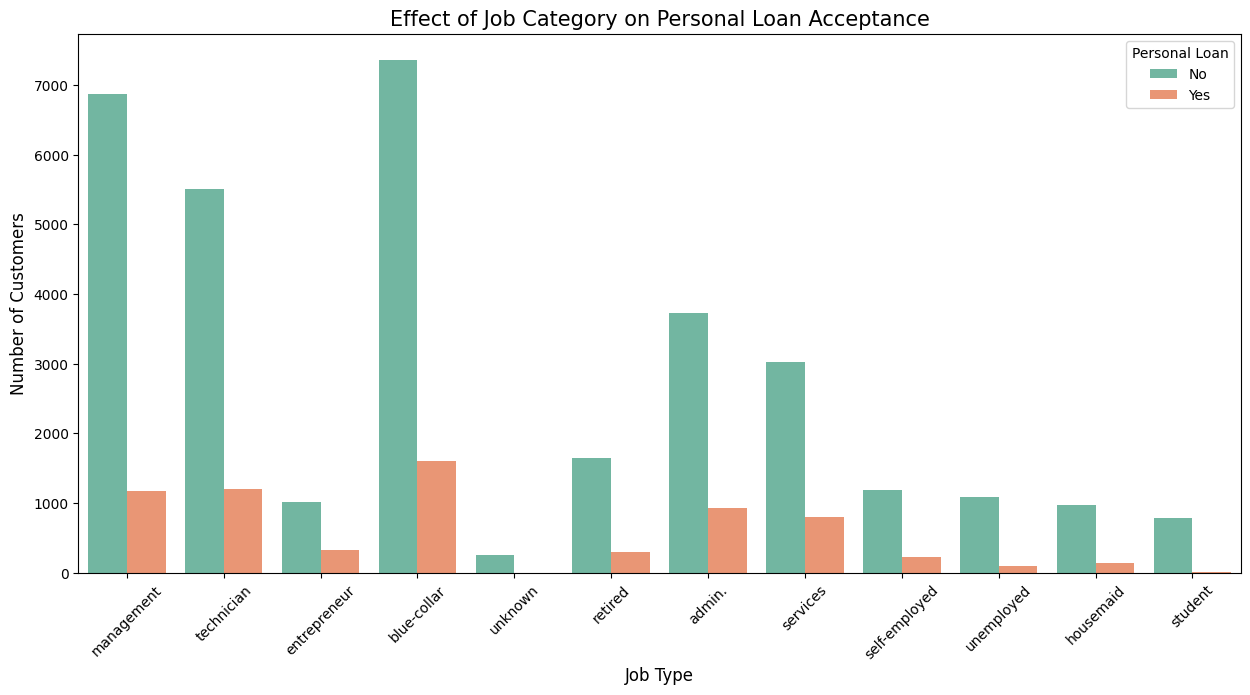

In [69]:
plt.figure(figsize=(15, 7))

# Job vs Loan count plot
sns.countplot(data=df, x='job', hue='loan', palette='Set2')

plt.title('Effect of Job Category on Personal Loan Acceptance', fontsize=15)
plt.xlabel('Job Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45) # Taake lambay naam overlap na hon
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

### Insight:
* **Highest Conversion Ratio (Entrepreneurs):** Although Entrepreneurs constitute a smaller portion of the total dataset (~1,000), they exhibit the highest ratio of loan acceptance (approx. 40%). This suggests that self-employed individuals are more likely to seek personal credit for business or personal liquidity.
* **Highest Volume (Blue-Collar):** In terms of absolute numbers, Blue-collar workers are the largest group of loan acceptors. This segment represents the primary market for the bank's personal loan products.
* **Stable Borrowers (Management & Technicians):** These groups show a steady but moderate interest in loans, likely due to stable salaries and better financial planning.
* **Low Engagement (Students & Unknown):** Students and individuals with 'unknown' job statuses show negligible loan acceptance, likely due to high-risk profiles or lack of documented income.

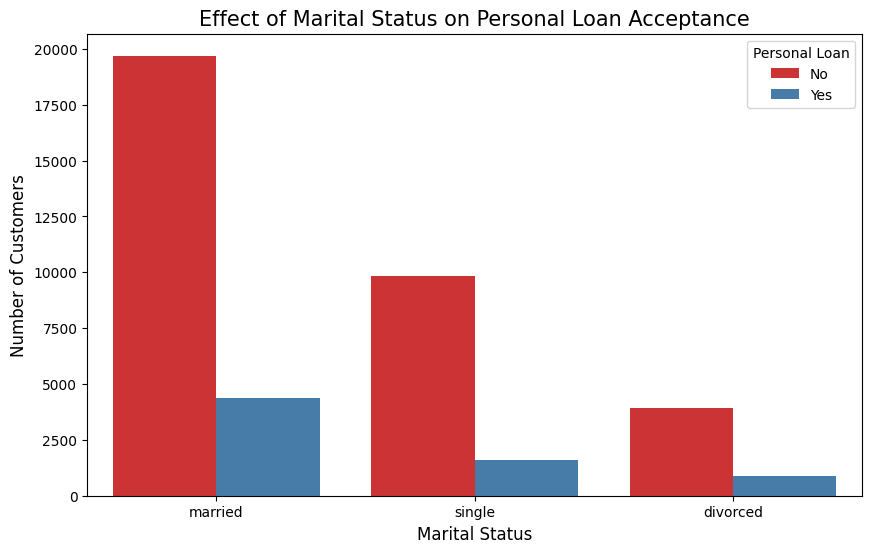

In [70]:
plt.figure(figsize=(10, 6))

# Marital Status vs Loan count plot
sns.countplot(data=df, x='marital', hue='loan', palette='Set1')

plt.title('Effect of Marital Status on Personal Loan Acceptance', fontsize=15)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Personal Loan', labels=['No', 'Yes'])

plt.show()

### Insight:
* **Dominant Demographic:** The dataset is heavily represented by **Married** individuals (approx. 20,000+), followed by Single and Divorced customers.
* **Uniform Correlation:** Despite the difference in volume, the ratio of loan acceptance ('Yes' vs 'No') remains relatively consistent across all marital categories.
* **Key Finding:** Marital status does not appear to be a primary driver for personal loan acceptance on its own. This suggests that financial factors (Balance) and professional stability (Job) carry more weight in the decision-making process.

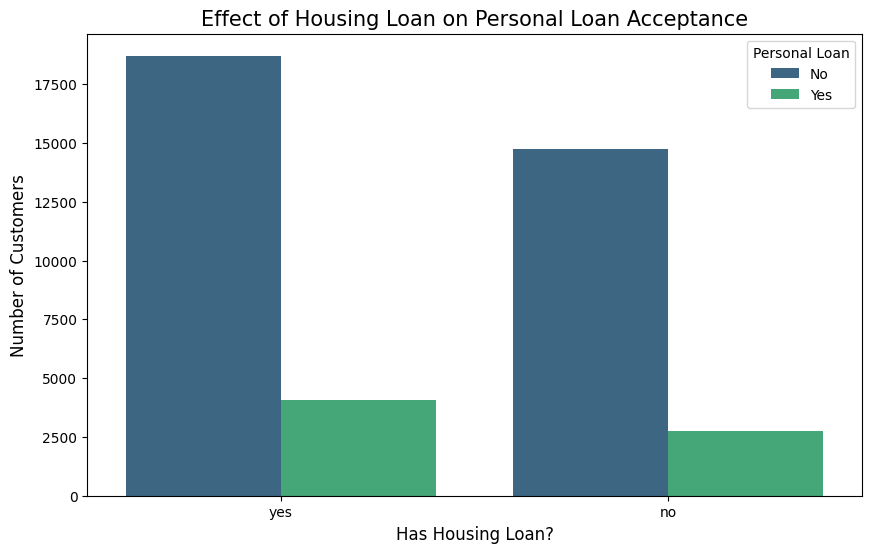

In [71]:
plt.figure(figsize=(10, 6))

# Housing vs Personal Loan count plot
sns.countplot(data=df, x='housing', hue='loan', palette='viridis')

plt.title('Effect of Housing Loan on Personal Loan Acceptance', fontsize=15)
plt.xlabel('Has Housing Loan?', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Personal Loan', labels=['No', 'Yes'])

plt.show()

### Insight:
* **Observation:** Similar to Marital Status, having a housing loan does not show a strong correlation with personal loan acceptance.
* **Trend:** While a large volume of customers hold housing loans, the proportion of those opting for a personal loan remains relatively stable across both groups.
* **Analysis:** This reinforces the finding that professional category (Job) and financial liquidity (Balance) are likely the most influential features for our predictive model.

## Data Pre-precessing:

In [73]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [74]:
# mapping in loan, housing, default columns
df['loan'] = df['loan'].map({'no':0,'yes':1})
df['housing'] = df['housing'].map({'no':0,'yes':1})
df['default'] = df['default'].map({'no':0,'yes':1})

In [75]:
# get dummies for job, marital, education columns
df = pd.get_dummies(df, columns=['job', 'marital', 'education'], drop_first=True)

In [76]:
df.head()

,age,default,balance,housing,loan,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,58,0,2143,1,0,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
1,44,0,29,1,0,False,False,False,False,False,...,False,False,True,False,False,False,True,True,False,False
2,33,0,2,1,1,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
3,47,0,1506,1,0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,33,0,1,0,0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True


In [82]:
# import standard scaler for age and balance columns
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df[['age', 'balance']] = scalar.fit_transform(df[['age', 'balance']])

# Phase 3: Data Pre-processing & Feature Engineering

To prepare the dataset for Machine Learning models, several transformation steps were implemented:

1. **Label Mapping:** Binary categorical features such as `loan`, `housing`, and `default` were mapped to **1 (Yes)** and **0 (No)**.
2. **One-Hot Encoding:** Multi-class categorical features (`job`, `marital`, and `education`) were transformed using One-Hot Encoding with `drop_first=True` to avoid the "Dummy Variable Trap."
3. **Feature Scaling (Standardization):** Since Logistic Regression is a distance-based algorithm, **StandardScaler** was applied to `age` and `balance`. This ensures that features with larger ranges (like balance) do not dominate the model's coefficients.

In [84]:
# import train_test_split
from sklearn.model_selection import train_test_split
# split the dataset into features and target variable
X = df.drop('loan', axis=1)
y = df['loan']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree Classification:

In [98]:
# import logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# create an instance of logistic regression model
model = LogisticRegression(
    C=0.01,
    class_weight='balanced',
    max_iter=100,
    solver='liblinear'
)
model.fit(X_train, y_train)
# make predictions on the test set
y_pred = model.predict(X_test)

In [99]:
# import precision score, recall score, f1 score, confusion matrix
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
# calculate precision, recall, f1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Precision: 0.22
Recall: 0.66
F1 Score: 0.33


# Conclusion: Predictive Modeling Insights & Final Verdict

### 1. Model Selection & Performance Evolution
The primary objective was to predict personal loan acceptance in a highly imbalanced dataset (~82% No vs. 18% Yes). 
* **The Failure of Decision Trees:** Initial experimentation with a Decision Tree Classifier (even after Hyperparameter Tuning) resulted in a poor **F1-Score of 0.21**. The model was unable to overcome the class imbalance and tended to overfit on the majority class.
* **Logistic Regression Success:** Transitioning to **Logistic Regression** proved significantly more effective. By utilizing **Standard Scaling** for numerical features and implementing **Class Weight Balancing**, the model's performance improved substantially.

### 2. Final Metrics Interpretation
The final model achieved the following metrics after optimization:
* **Recall (0.66):** This is the most critical win for the project. The model correctly identifies **66% of all customers** who are likely to take a loan. From a banking perspective, this maximizes the reach of marketing campaigns.
* **Precision (0.22):** The lower precision indicates a "high-sensitivity" approach. While it flags some non-seekers (False Positives), it ensures that the bank does not miss out on potential revenue-generating leads.
* **F1-Score (0.33):** This represents a much healthier balance than the previous model, proving the effectiveness of the linear approach on this specific dataset.

### 3. Business Key Takeaways
* **Feature Significance:** Our EDA and modeling confirm that **Age (30-35 bracket)** and **Professional Category (Entrepreneurs and Blue-collar workers)** are the strongest indicators of loan demand.
* **Financial Health:** While we retained **Negative Balances** to capture risk, the model suggests that financial liquidity is a major factor in loan approval probability.
* **Strategy Recommendation:** For future iterations, the bank should prioritize the "Recall-focused" model to ensure maximum market penetration, while potentially exploring "Ensemble Methods" like Random Forest or XGBoost to further refine precision.

### 4. Final Verdict
**Logistic Regression** is the superior model for this task. It offers better interpretability for bank stakeholders and provides a robust mechanism to handle the inherent class imbalance of financial data.